# PROBLEM-TO FORECAST DEMAND  ELECTICITY FOR NEXT 3 YEARS 


REQUIRED LIBRARIES EDA

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

DATA IMPORTING

In [2]:
df=pd.read_csv("nyc_energy_consumption.csv") # TO IMPORT CSV DATA SET

In [3]:
df.head()

,timeStamp,demand,precip,temp
0,01-01-2012 00:00,4937.5,0.0,46.13
1,01-01-2012 01:00,4752.1,0.0,45.89
2,01-01-2012 02:00,4542.6,0.0,45.04
3,01-01-2012 03:00,4357.7,0.0,45.03
4,01-01-2012 04:00,4275.5,0.0,42.61



# EDA-EXPLORADITERY DATA ANALYSIS

In [4]:
df.info() #to koow about variable datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeStamp  49205 non-null  object 
 1   demand     49124 non-null  float64
 2   precip     48975 non-null  float64
 3   temp       49019 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df['timeStamp']=pd.to_datetime(df['timeStamp']) # to convert object data time to datetime

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ",df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


HERE IS AM WE CAN SEE SHAPE,FATURES,NULLVALUES AND UNIQUE VALUES IN OUT DATA

In [8]:
#BY USING describe(), we will get mean,median,std,quantiles of our data

In [9]:
df.describe() 

,demand,precip,temp
count,49124.000000,48975.000000,49019.000000
mean,6067.447361,0.003522,55.520428
std,1285.607657,0.022841,17.704848
min,2859.600000,0.000000,0.330000
25%,5133.862250,0.000000,41.415000
50%,6020.071000,0.000000,56.260000
75%,6684.300000,0.000000,70.540000
max,11456.000000,0.905100,97.260000


In [10]:
df_ts = df.set_index('timeStamp')# to work on timeseries we need to convert our timestamp column into index to make easy for us

In [11]:
df_ts.head()

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61


# MULTIVARIENT ANALYSIS 

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

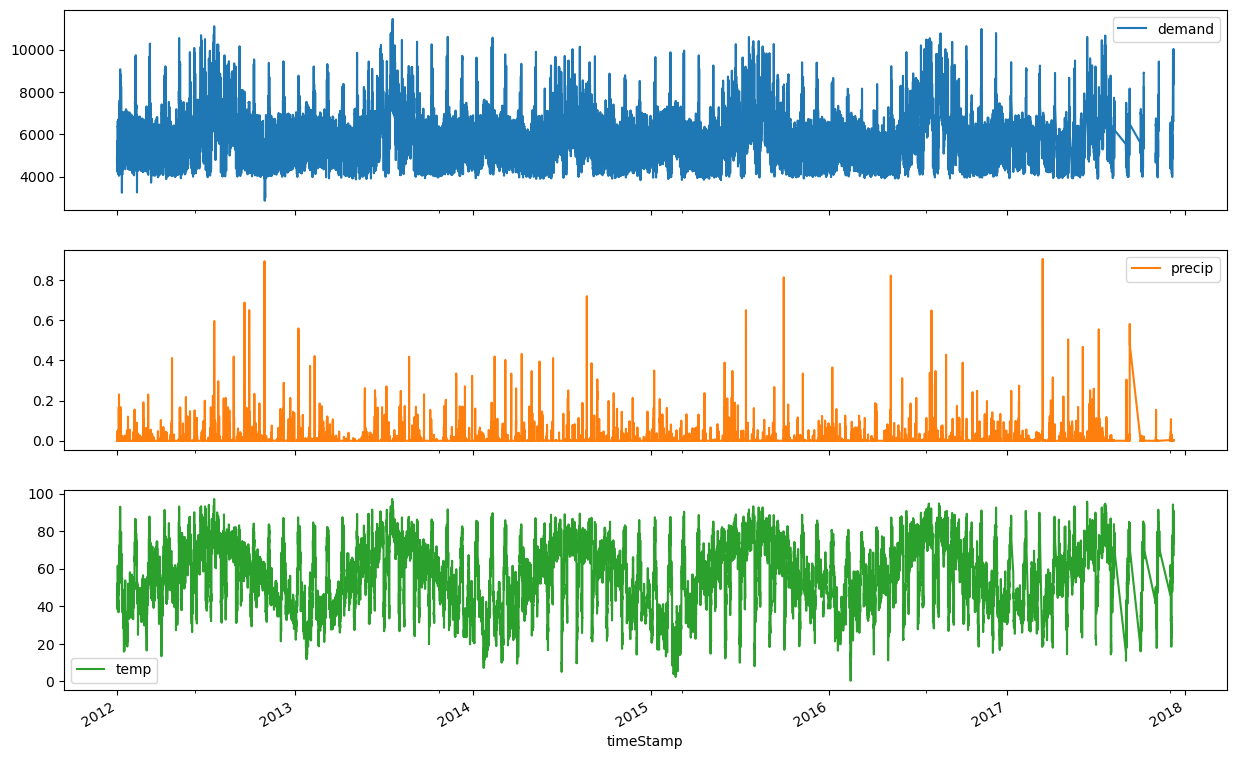

In [12]:
df_ts.plot(subplots=True,figsize=(15, 10))

FROM THE ABOVE GRAPH WE CAN OBSERVE THE RELATION BOTH TEMP AND DEMAND BEHAVIOUS SAME

TO UNDERSTAND MORE DEEP I TOOK THE DATA FOR SPECIFIC TIME STAMP

 ALSO DATA POINTS ARE MORE, WILL TAKE TIME DURING PREDECTION

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

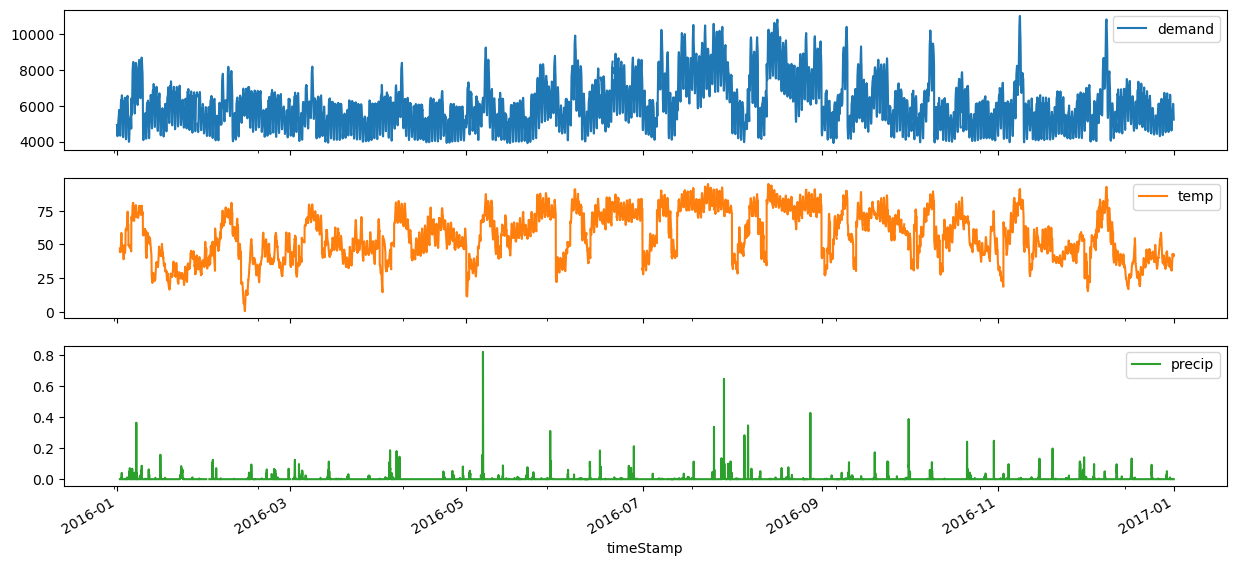

In [13]:
df_2016=df_ts.loc['2016']
df__demand_temp_2016=df_2016[['demand','temp','precip']]
df__demand_temp_2016.plot(subplots=True,figsize=(15, 7))

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

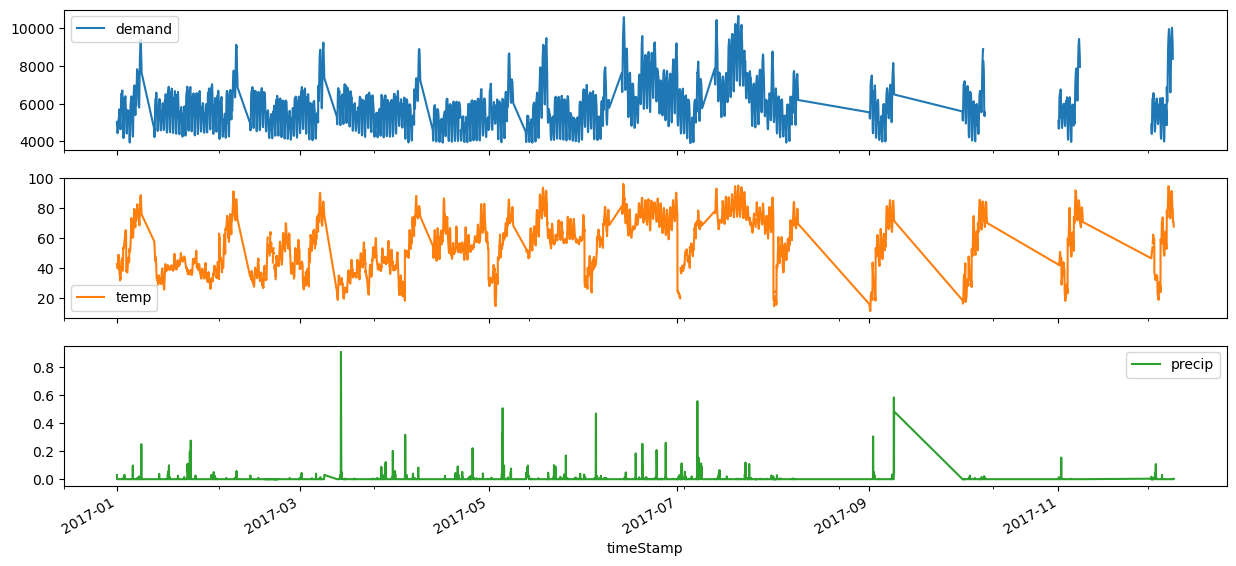

In [14]:
df_2017=df_ts.loc['2017']
df__demand_temp_2017=df_2017[['demand','temp','precip']]
df__demand_temp_2017.plot(subplots=True,figsize=(15, 7))

FROM THE ABOVE 2 GRAPHS WE CAN CONCLUDE THAT BOTH TEMP AND DEMAND ARE BEHAVING SAME AND PRECIPATATION IS ALSO SHOWING SOME NAGATIVE IMPACT

array([[<AxesSubplot:title={'center':'demand'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'precip'}>, <AxesSubplot:>]],
      dtype=object)

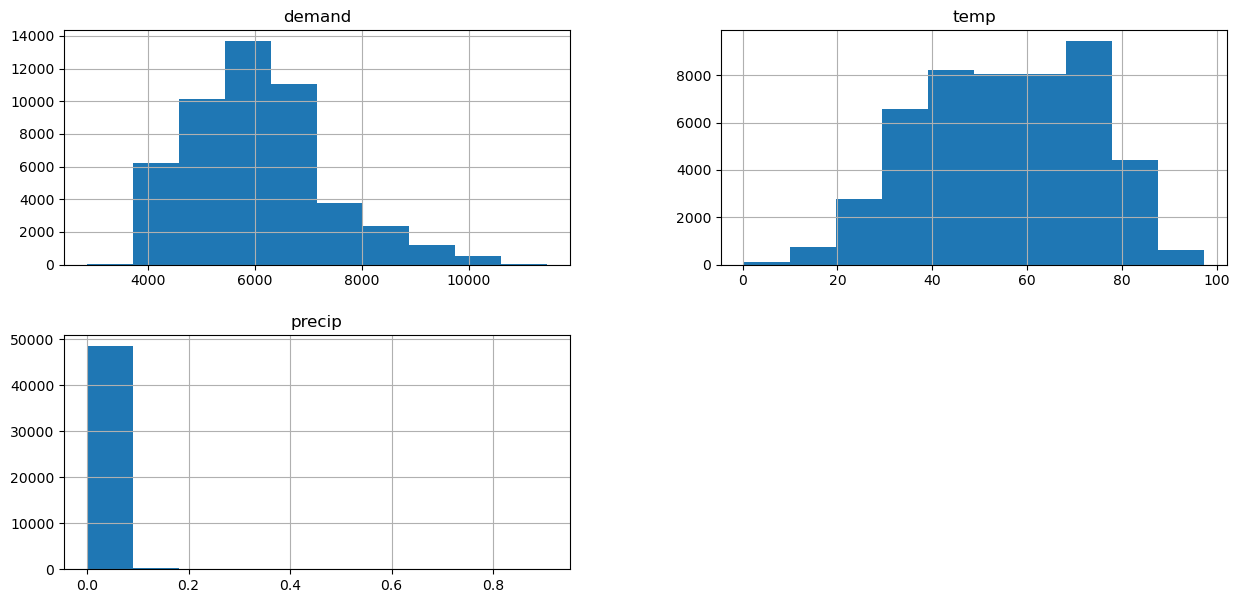

In [15]:
df_ts[['demand','temp','precip']].hist(figsize=(15, 7))


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

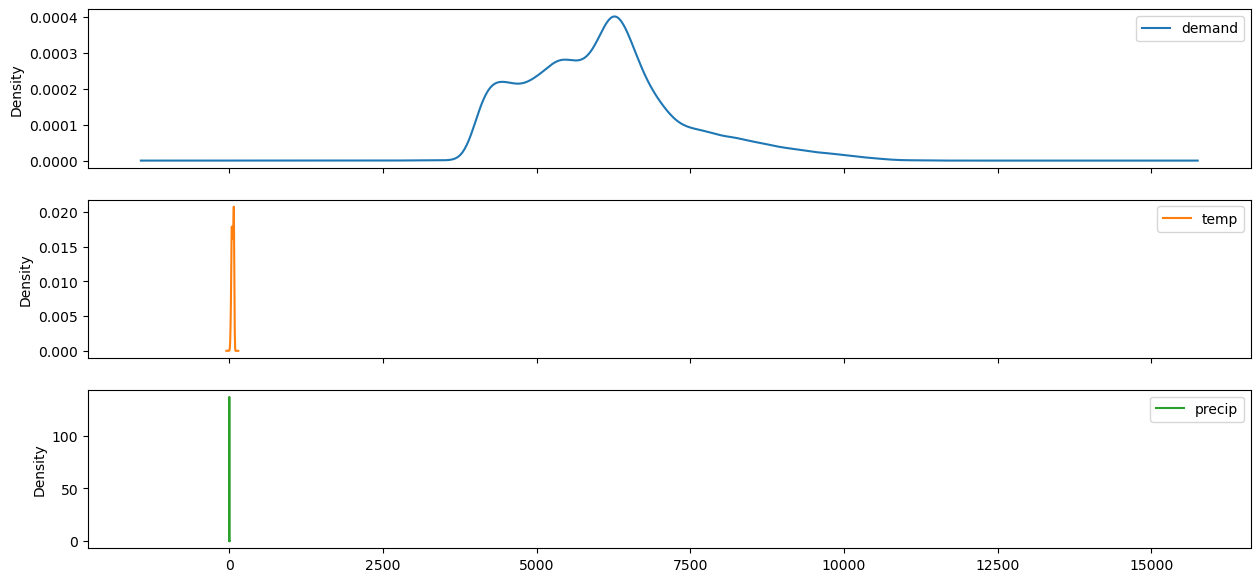

In [16]:
df_ts[['demand','temp','precip']].plot(kind='density',subplots=True,figsize=(15, 7))

# PLOT DEMAND VS TIME (2017)

<AxesSubplot:xlabel='timeStamp'>

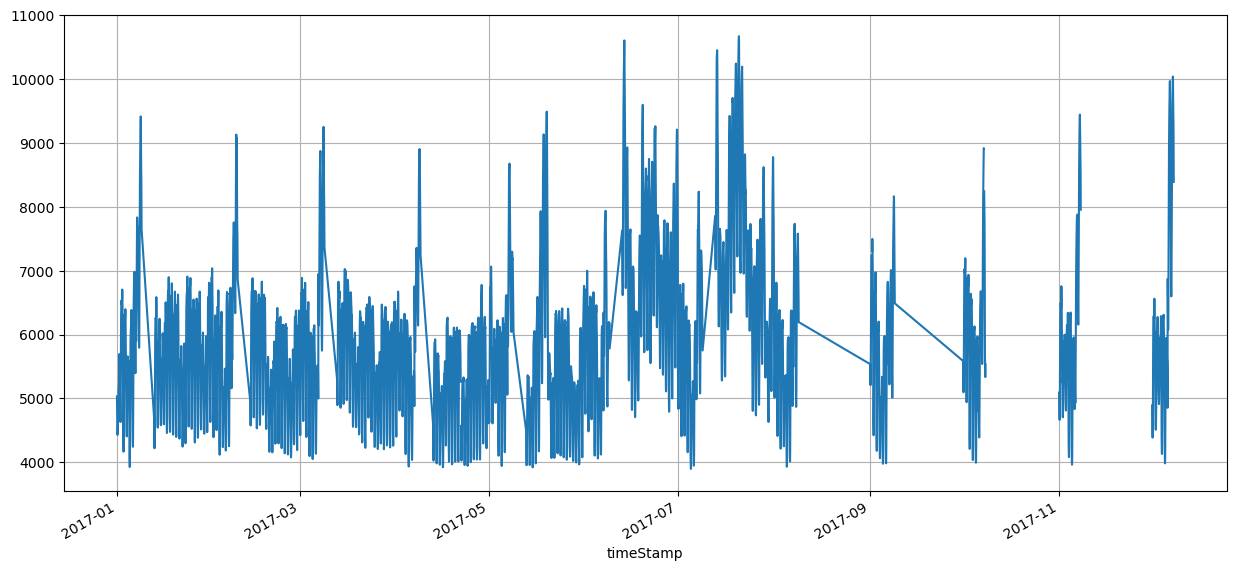

In [17]:
df_2017=df_ts.loc['2017']
df_demand_2017=df_2017['demand']
df_demand_2017.plot(grid=True,figsize=(15, 7))

<AxesSubplot:xlabel='timeStamp'>

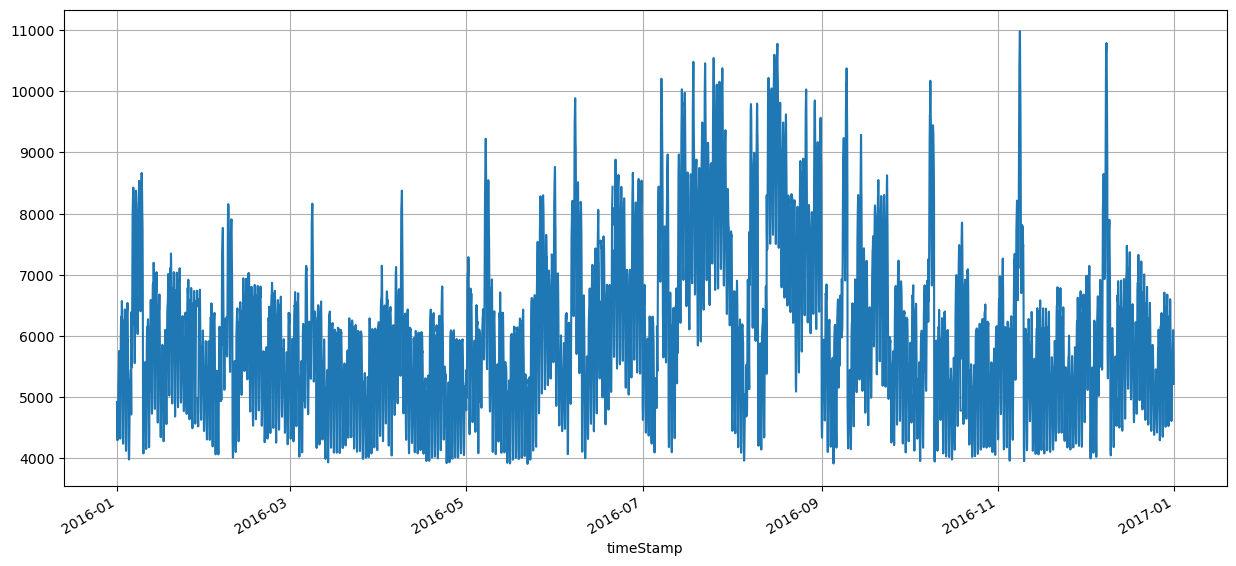

In [18]:
df_2016=df_ts.loc['2016']
df_demand_2016=df_2016['demand']
df_demand_2016.plot(grid=True,figsize=(15, 7))


FROM THE ABOVE 2 GRAPHS WE CAN CONCLUDE THERE IS A SEASONALITY, AT EVERY YEAR 7-9 MONTH GRAPH IS AT PEAK POINT


In [19]:
aq_corr=df_ts[['demand','temp','precip']].corr(method='pearson')
aq_corr

,demand,temp,precip
demand,1.000000,0.510770,0.011427
temp,0.510770,1.000000,-0.001429
precip,0.011427,-0.001429,1.000000


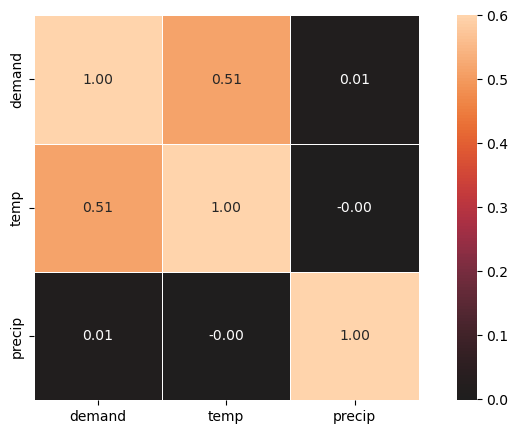

In [20]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,square=True, linewidths=.5, annot=True, fmt='.2f')
g.figure.set_size_inches(10,5)
    
plt.show()

FROM THE ABOVE ANALYSIS I CONSEDERED DEMAND FOR FORECAST

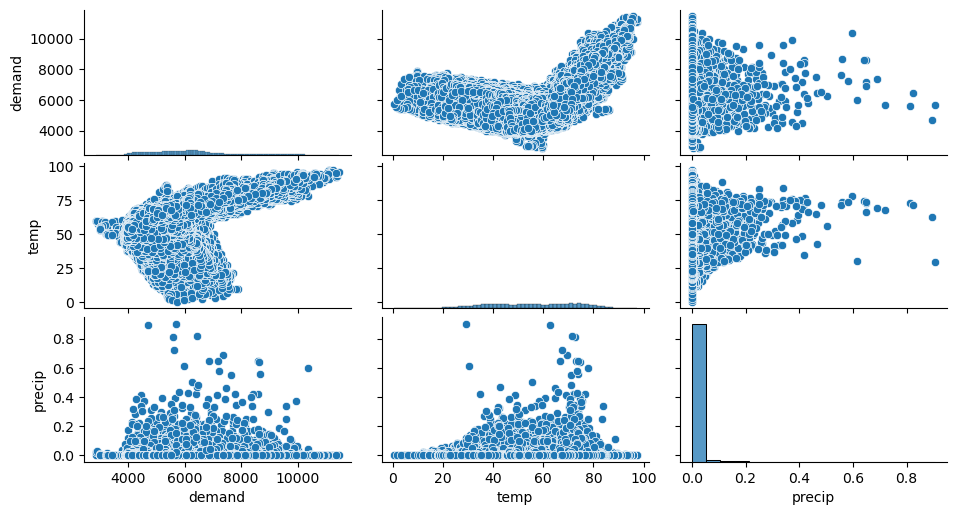

In [21]:
g = sns.pairplot(df_ts[['demand','temp','precip']])
g.figure.set_size_inches(10,5)

In [22]:
df_ts.shape # find no of rows and columns

(49205, 3)

In [23]:
df_ts.isna().sum()

demand     81
precip    230
temp      186
dtype: int64

In [24]:
df_ts['demand']=df_ts['demand'].fillna(method='ffill')
df_ts['temp']=df_ts['temp'].fillna(method='ffill') 
df_ts['precip']=df_ts['precip'].fillna(method='ffill') 

In [25]:
df_ts.isna().sum()

demand    0
precip    0
temp      0
dtype: int64

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

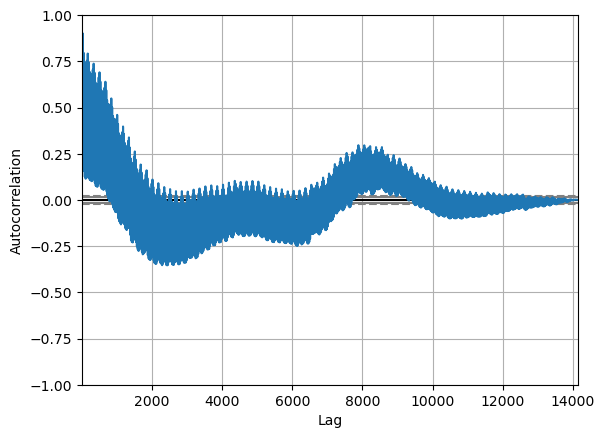

In [26]:
pd.plotting.autocorrelation_plot(df_ts['2016':'2017']['demand'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

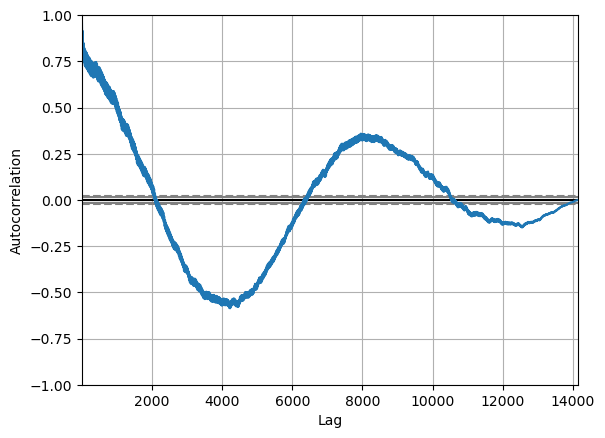

In [27]:
pd.plotting.autocorrelation_plot(df_ts['2016':'2017']['temp'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

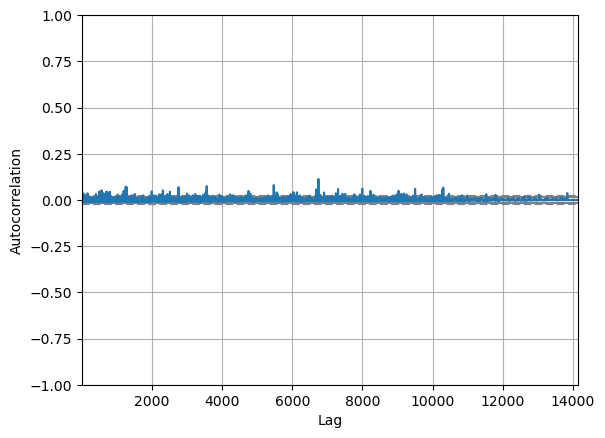

In [28]:
pd.plotting.autocorrelation_plot(df_ts['2016':'2017']['precip'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

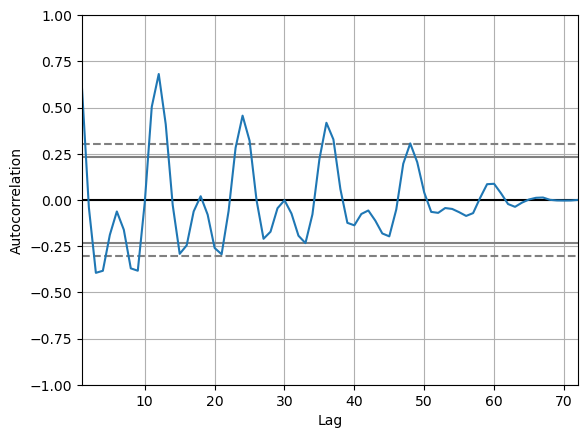

In [29]:
pd.plotting.autocorrelation_plot(df_ts['demand'].resample("1m").mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

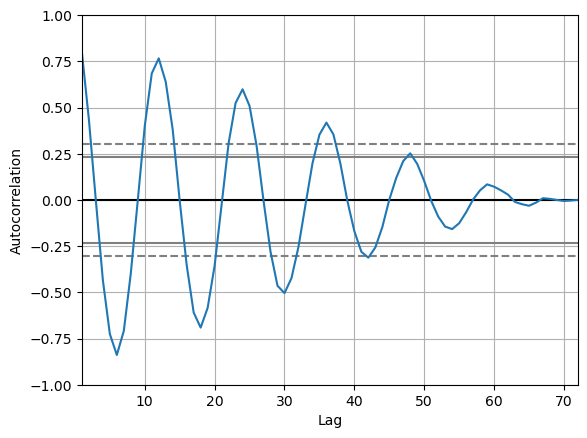

In [30]:
pd.plotting.autocorrelation_plot(df_ts['temp'].resample("1m").mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

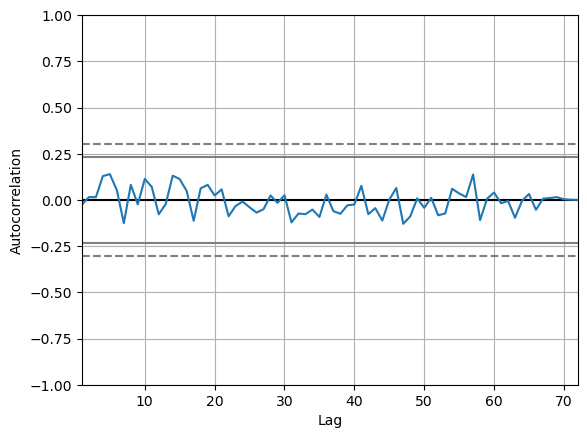

In [31]:
pd.plotting.autocorrelation_plot(df_ts['precip'].resample("1m").mean())

array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

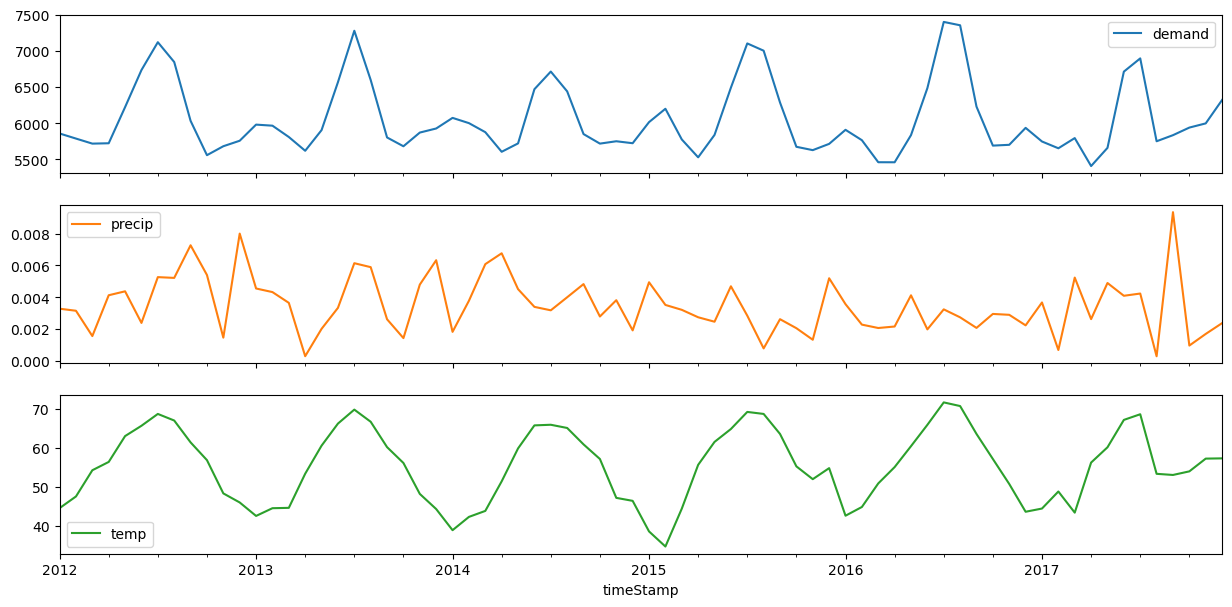

In [32]:
df_ts.resample('M').mean().plot(subplots=True,figsize=(15, 7))

In [33]:
df_ts_monthly=df_ts.resample('M').mean()

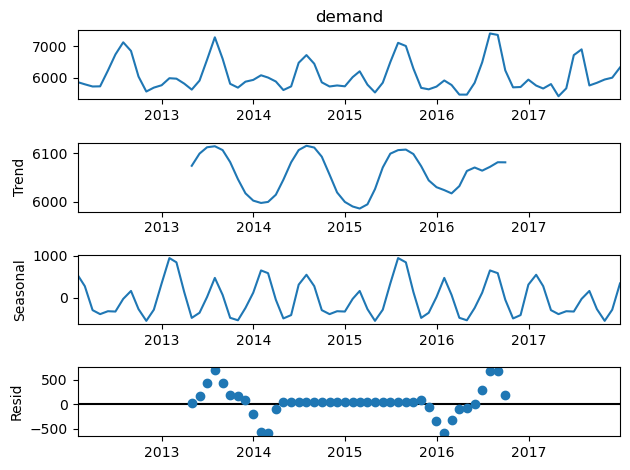

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df_ts_monthly['demand'],period=30)
result.plot();

FROM THE ABOVE ANALYSIS I CONSEDERED DEMAND FOR FORECAST

In [35]:
df_ts_monthly.shape

(72, 3)

In [36]:
df_ts.shape

(49205, 3)

# HYPOTHESIS TESTING

In [37]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_ts_monthly['demand'],autolag='AIC')

(-2.871204316810584,
 0.048800476026175786,
 10,
 61,
 {'1%': -3.542412746661615,
  '5%': -2.910236235808284,
  '10%': -2.5927445767266866},
 811.4129053766799)

 We can reject the Null hypothesis because the p-value is less than 0.05. Furthermore, values. the data is stationary. 
 
 No need of any differencing method  "d" value=0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


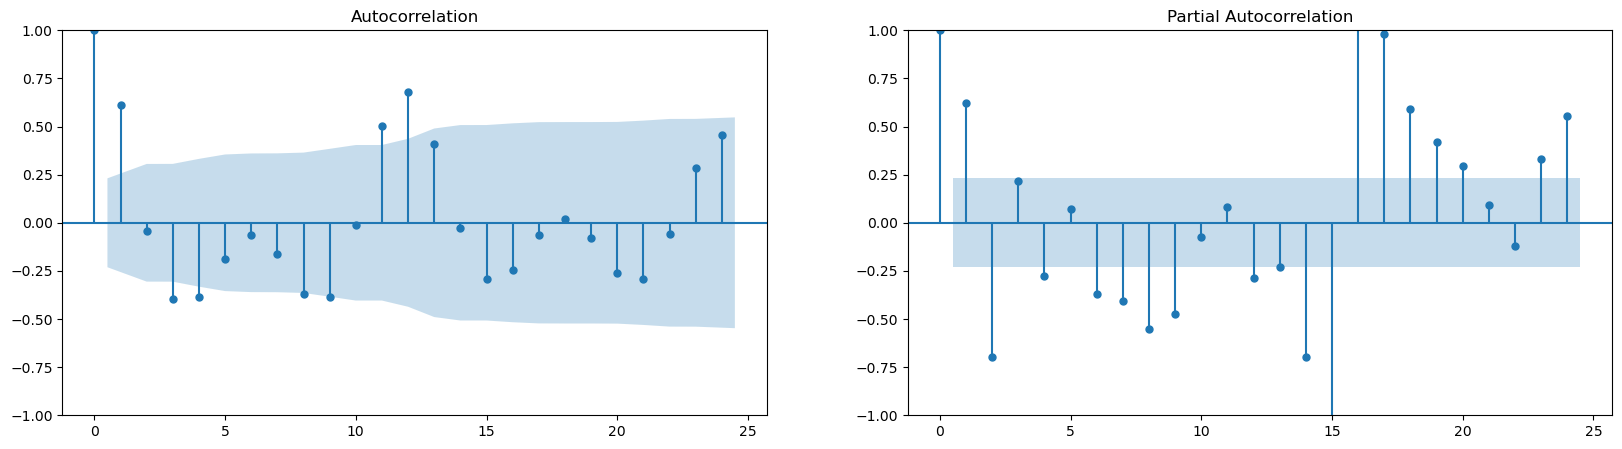

In [38]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig,ax=plt.subplots(1,2,figsize=(20,5))

plot_acf(df_ts_monthly['demand'].dropna(), title='Autocorrelation', lags= 24,ax=ax[0]);
plot_pacf(df_ts_monthly['demand'].dropna(), title='Partial Autocorrelation', lags=24,ax=ax[1]);


for 1,12,.. having grometrical decay in autocorelation so its a seasonal data

seasonality m=12 , p=1 ,q=0 , d=0


FROM ABOVE OUR (P,D,Q) VALUES ARE (1,0,0)

# PREDECTION

# GRID SEARCH - AUTOARIMA

In [39]:
import pmdarima as pm

model = pm.auto_arima(df_ts_monthly['demand'], m=12, seasonal=True,start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  suppress_warnings=True,stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=861.751, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=852.822, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=839.338, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=860.059, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=841.941, Time=0.12 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=841.961, Time=0.22 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=857.809, Time=0.29 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=841.013, Time=0.46 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=840.905, Time=0.60 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=849.976, Time=0.38 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=inf, T

# AS PER GRID SEARCH AUTO ARIMA BEST MODEL IS  ARIMA(0,0,1)(0,1,2)[12] 

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   72
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -414.699
Date:                                 Thu, 20 Jul 2023   AIC                            837.398
Time:                                         08:55:34   BIC                            845.776
Sample:                                     01-31-2012   HQIC                           840.675
                                          - 12-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6572      0.092      7.131      0.000       0.477       0.838
ma.S.L12      -0.2702      0.162     -1.663      0.096      -0.589       0.048
ma.S.L24      -0.2011      0.142     -1.419      0.156      -0.479       0.077
sigma2      5.004e+04   1.05e+04      4.763      0.000    2.94e+04    7.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               117.91
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                            -1.82
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# TRAIN_TEST DATA SPLIT

In [41]:
train=df_ts_monthly[(df_ts_monthly.index.get_level_values(0) >= '2012-01-31') & (df_ts_monthly.index.get_level_values(0) <= '2017-04-30')]
test=df_ts_monthly[(df_ts_monthly.index.get_level_values(0) > '2017-04-30')]

In [42]:
test.shape

(8, 3)

In [43]:
train.shape

(64, 3)

In [44]:
model.fit(train['demand'])

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [45]:

forecast=model.predict(n_periods=8, return_conf_int=True)

In [46]:
forecast

(2017-05-31    5721.968017
 2017-06-30    6489.343805
 2017-07-31    7229.275771
 2017-08-31    7112.238824
 2017-09-30    6089.255482
 2017-10-31    5668.061121
 2017-11-30    5705.796740
 2017-12-31    5884.123778
 Freq: M, dtype: float64,
 array([[5403.01503529, 6040.92099911],
        [6130.03282098, 6848.6547892 ],
        [6869.96478731, 7588.58675562],
        [6752.92783979, 7471.5498081 ],
        [5729.94449807, 6448.56646638],
        [5308.75013707, 6027.37210538],
        [5346.48577294, 6065.10770757],
        [5524.91028128, 6243.33727489]]))

In [47]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction']) # conversion from touple to dataframe

In [48]:
forecast_df

,Prediction
timeStamp,
2017-05-31,5721.968017
2017-06-30,6489.343805
2017-07-31,7229.275771
2017-08-31,7112.238824
2017-09-30,6089.255482
2017-10-31,5668.061121
2017-11-30,5705.796740
2017-12-31,5884.123778


<AxesSubplot:xlabel='timeStamp'>

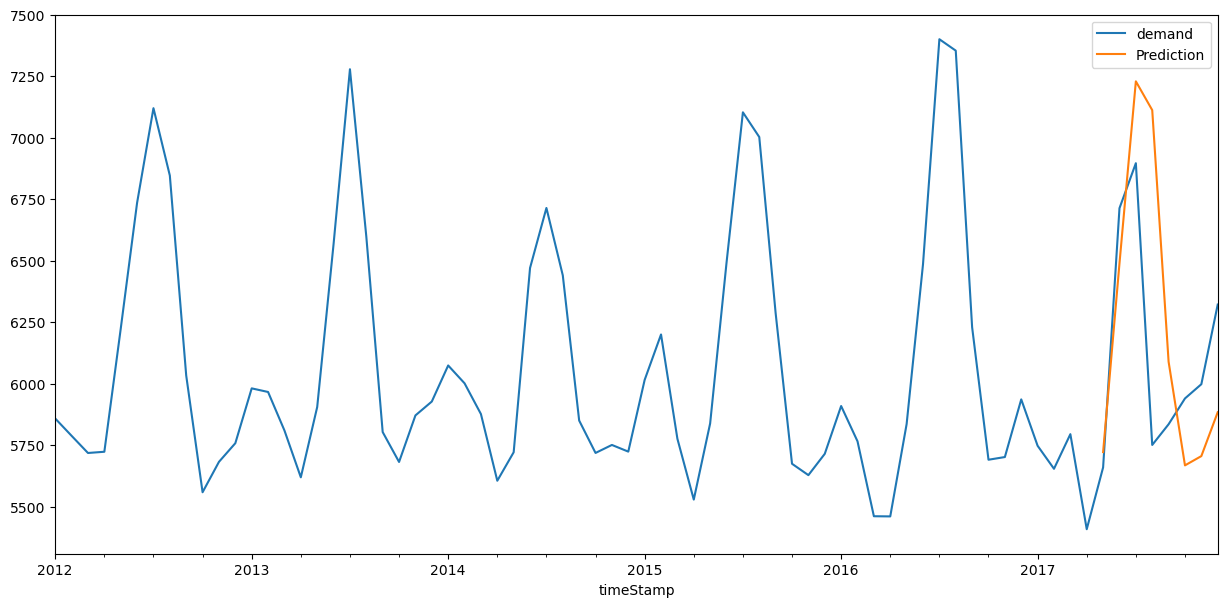

In [49]:
pd.concat([df_ts_monthly['demand'],forecast_df],axis=1).plot(figsize=(15, 7))

In [50]:
forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')
forecast_range

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [51]:
forecast[1][:, 0]

array([5403.01503529, 6130.03282098, 6869.96478731, 6752.92783979,
       5729.94449807, 5308.75013707, 5346.48577294, 5524.91028128])

In [52]:
forecast[1][:, 1]

array([6040.92099911, 6848.6547892 , 7588.58675562, 7471.5498081 ,
       6448.56646638, 6027.37210538, 6065.10770757, 6243.33727489])

In [53]:
lower=pd.Series(forecast[1][:, 0], index =forecast_range)
upper=pd.Series(forecast[1][:, 1], index =forecast_range)

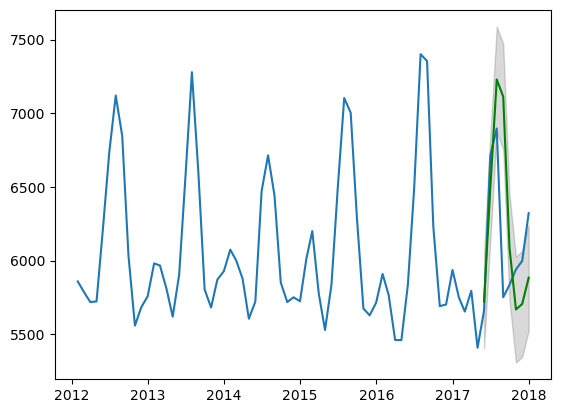

In [54]:
plt.plot(df_ts_monthly['demand'])
plt.plot(forecast_df, color='green')
plt.fill_between(forecast_range, lower, upper,color='black', alpha=0.15)

# ARIMA MODEL FOR AUTO ARIMA VALUES 

In [55]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [56]:
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

model = ARIMA(train['demand'], order=(0,1,2))
results_aa_ar = model.fit()
results_aa_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   64
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -457.357
Date:                Thu, 20 Jul 2023   AIC                            920.714
Time:                        08:55:35   BIC                            927.143
Sample:                    01-31-2012   HQIC                           923.242
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1540     20.591     -0.007      0.994     -40.511      40.203
ma.L2         -0.8457     17.439     -0.048      0.961     -35.026      33.334
sigma2      1.018e+05   2.09e+06      0.049      0.961   -3.99e+06     4.2e+06
===================================================================================
Ljung-Box (L1) (Q):                  11.28   Jarque-Bera (JB):                11.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                             1.01
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:

predictions_aa_ar = results_aa_ar.predict(start=len(train), end=len(df_ts_monthly)-1)

In [58]:
# compare predicted to expected values
for i in range(len(predictions_aa_ar)):
    print(f"predicted = {predictions_aa_ar[i]}, expected = {test['demand'][i]}")

predicted = 5610.8585302942565, expected = 5659.811777777778
predicted = 6026.3370438572965, expected = 6713.551091346154
predicted = 6026.3370438572965, expected = 6896.509324074074
predicted = 6026.3370438572965, expected = 5751.095125
predicted = 6026.3370438572965, expected = 5835.259494791667
predicted = 6026.3370438572965, expected = 5940.14121875
predicted = 6026.3370438572965, expected = 5998.057947916666
predicted = 6026.3370438572965, expected = 6321.863982758621


<AxesSubplot:xlabel='timeStamp'>

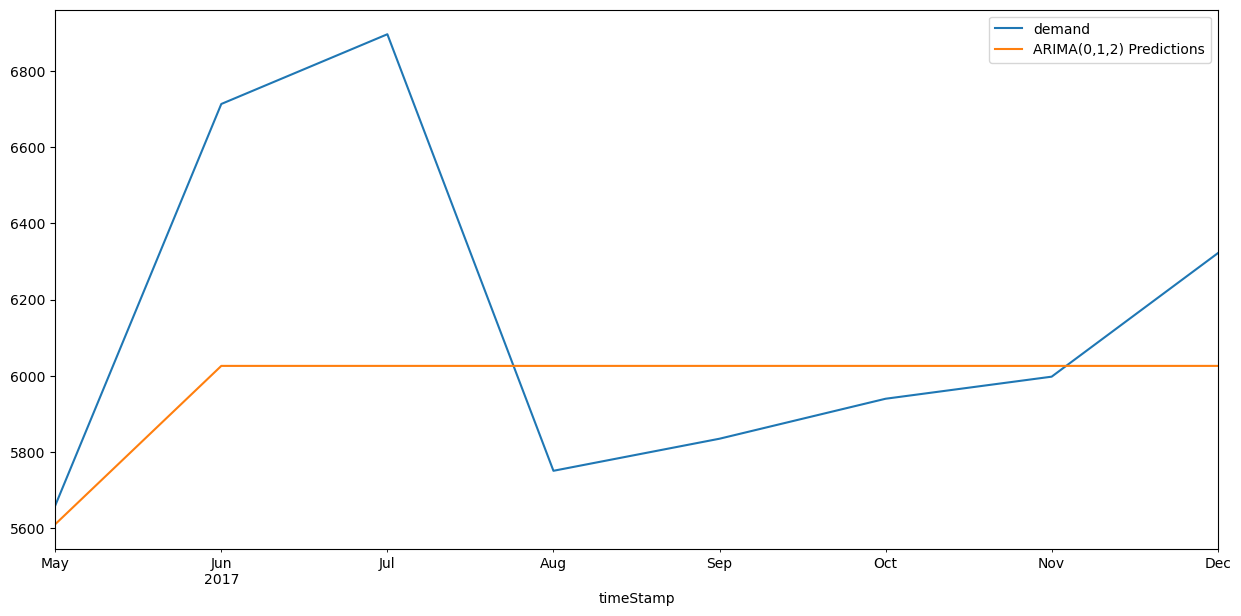

In [59]:
# plot predicted vs observed (test data)
test['demand'].plot(legend=True)
predictions_aa_ar.rename('ARIMA(0,1,2) Predictions').plot(legend=True,figsize=(15, 7))


In [60]:
RES_aa_ar=test['demand']-predictions_aa_ar
RES_aa_ar

timeStamp
2017-05-31     48.953247
2017-06-30    687.214047
2017-07-31    870.172280
2017-08-31   -275.241919
2017-09-30   -191.077549
2017-10-31    -86.195825
2017-11-30    -28.279096
2017-12-31    295.526939
Freq: M, dtype: float64

# ARIMA MODEL FOR PREDICTED P,D,Q VALUES 

In [61]:
model = ARIMA(train['demand'], order=(1,0,0))
results_pr_ar = model.fit()
results_pr_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   64
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -470.290
Date:                Thu, 20 Jul 2023   AIC                            946.580
Time:                        08:55:35   BIC                            953.056
Sample:                    01-31-2012   HQIC                           949.131
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6025.0342    186.256     32.348      0.000    5659.979    6390.090
ar.L1          0.6570      0.100      6.558      0.000       0.461       0.853
sigma2      1.401e+05   2.73e+04      5.126      0.000    8.65e+04    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                  15.24   Jarque-Bera (JB):                 5.64
Prob(Q):                              0.00   Prob(JB):                         0.06
Heteroskedasticity (H):               1.07   Skew:                             0.72
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
predictions_pr_ar = results_pr_ar.predict(start=len(train), end=len(df_ts_monthly)-1)
# compare predicted to expected values
for i in range(len(predictions_aa_ar)):
    print(f"predicted = {predictions_pr_ar[i]}, expected = {test['demand'][i]}")

predicted = 5619.990125305057, expected = 5659.811777777778
predicted = 5758.923135995607, expected = 6713.551091346154
predicted = 5850.201130753332, expected = 6896.509324074074
predicted = 5910.1701207405185, expected = 5751.095125
predicted = 5949.56931842917, expected = 5835.259494791667
predicted = 5975.454309636145, expected = 5940.14121875
predicted = 5992.460563801013, expected = 5998.057947916666
predicted = 6003.633551205475, expected = 6321.863982758621


<AxesSubplot:xlabel='timeStamp'>

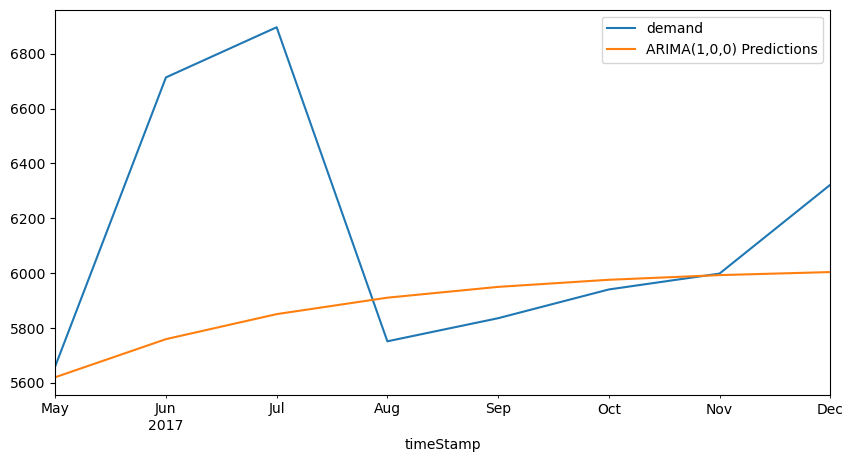

In [63]:
# plot predicted vs observed (test data)
test['demand'].plot(legend=True)
predictions_pr_ar.rename('ARIMA(1,0,0) Predictions').plot(legend=True,figsize=(10, 5))

In [64]:
RES_pr_ar=test['demand']-predictions_pr_ar
RES_pr_ar

timeStamp
2017-05-31      39.821652
2017-06-30     954.627955
2017-07-31    1046.308193
2017-08-31    -159.074996
2017-09-30    -114.309824
2017-10-31     -35.313091
2017-11-30       5.597384
2017-12-31     318.230432
Freq: M, dtype: float64

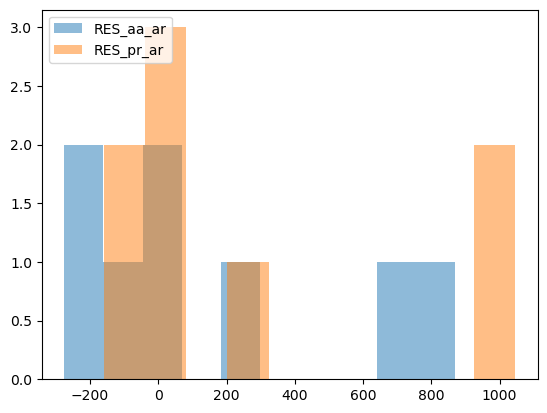

In [65]:
plt.hist(RES_aa_ar,alpha=0.5, label='RES_aa_ar')
plt.hist(RES_pr_ar,alpha=0.5, label='RES_pr_ar')
plt.legend(loc='upper left')
plt.show()

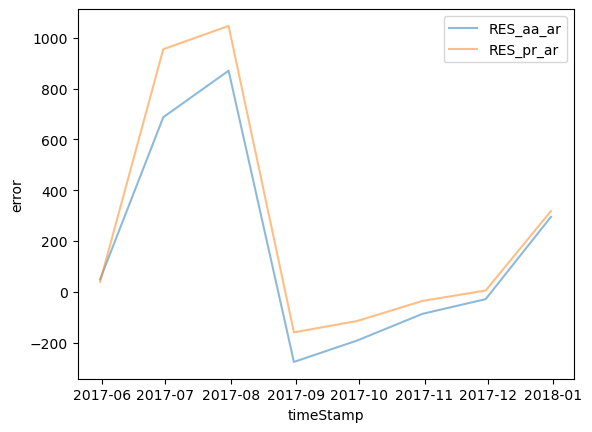

In [66]:
plt.plot(RES_aa_ar,alpha=0.5, label='RES_aa_ar')
plt.plot(RES_pr_ar,alpha=0.5, label='RES_pr_ar')
plt.ylabel("error")
plt.xlabel("timeStamp")
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:>

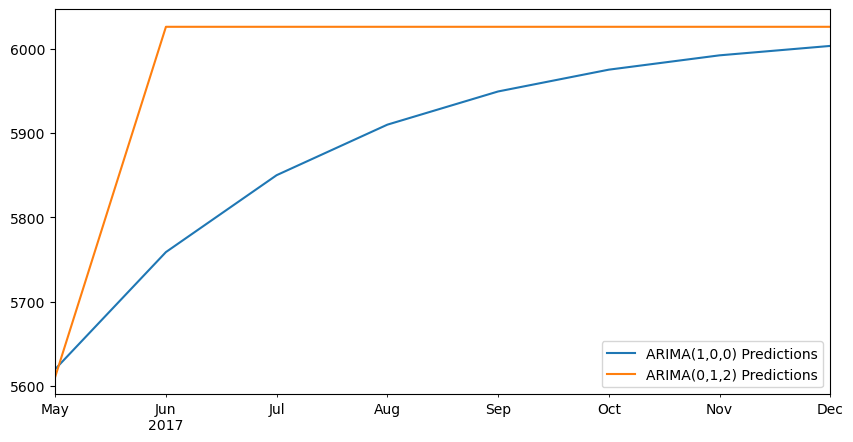

In [67]:
predictions_pr_ar.rename('ARIMA(1,0,0) Predictions').plot(legend=True,figsize=(10, 5))
predictions_aa_ar.rename('ARIMA(0,1,2) Predictions').plot(legend=True,figsize=(10, 5))

#RMSE AUTO ARIMA

In [68]:
from sklearn.metrics import mean_squared_error

MSE_aa_ar = mean_squared_error(test['demand'], predictions_aa_ar)
print('ARIMA(0,1,2) MSE error : ', MSE_aa_ar)

ARIMA(0,1,2) MSE error :  179961.713445697


In [69]:
# RMSE - root mean squared error
RMSE_aa_ar = MSE_aa_ar**(1/2)
print('ARIMA(0,1,2) RMSE error : ', RMSE_aa_ar)

ARIMA(0,1,2) RMSE error :  424.21894517536225


#RMSE PREDECTED PDQ VALUES

In [70]:
MSE_pr_ar = mean_squared_error(test['demand'], predictions_pr_ar)
print('ARIMA(1,0,0) MSE error : ', MSE_pr_ar)

ARIMA(1,0,0) MSE error :  268572.7094082246


In [71]:
# RMSE - root mean squared error
RMSE_pr_ar = MSE_pr_ar**(1/2)
print('ARIMA(1,0,0) RMSE error : ', RMSE_pr_ar)

ARIMA(1,0,0) RMSE error :  518.2400113926217


# SARIMAX - MODEL FROM AUTO ARIMA VALUES

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['demand'], order=(0,0,1), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False)
results = model.fit()
results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  demand   No. Observations:                   64
Model:             SARIMAX(0, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -342.078
Date:                                 Thu, 20 Jul 2023   AIC                            692.155
Time:                                         08:55:36   BIC                            699.960
Sample:                                     01-31-2012   HQIC                           695.147
                                          - 04-30-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5188      0.143      3.626      0.000       0.238       0.799
ma.S.L12      -0.2068      0.158     -1.307      0.191      -0.517       0.103
ma.S.L24      -0.3262      0.155     -2.100      0.036      -0.631      -0.022
sigma2      2.631e+04   6413.450      4.103      0.000    1.37e+04    3.89e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.11
Prob(Q):                              0.96   Prob(JB):                         0.57
Heteroskedasticity (H):               1.52   Skew:                            -0.36
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:

predictions_aa_sr = results.predict(start=len(train), end=len(df_ts_monthly)-1, typ='levels')

In [74]:
# compare predicted to expected values
for i in range(len(predictions_aa_sr)):
    print(f"predicted = {predictions_aa_sr[i]}, expected = {test['demand'][i]}")

predicted = 5721.968680585291, expected = 5659.811777777778
predicted = 6489.343944670831, expected = 6713.551091346154
predicted = 7229.27565024932, expected = 6896.509324074074
predicted = 7112.238849911069, expected = 5751.095125
predicted = 6089.255336214183, expected = 5835.259494791667
predicted = 5668.061218751749, expected = 5940.14121875
predicted = 5705.796878154889, expected = 5998.057947916666
predicted = 5884.12389569616, expected = 6321.863982758621


In [75]:
RES_aa_sr=test['demand']-predictions_aa_sr
RES_aa_sr.sum() 

-783.7744918185317

Text(0.5, 0, 'timeStamp')

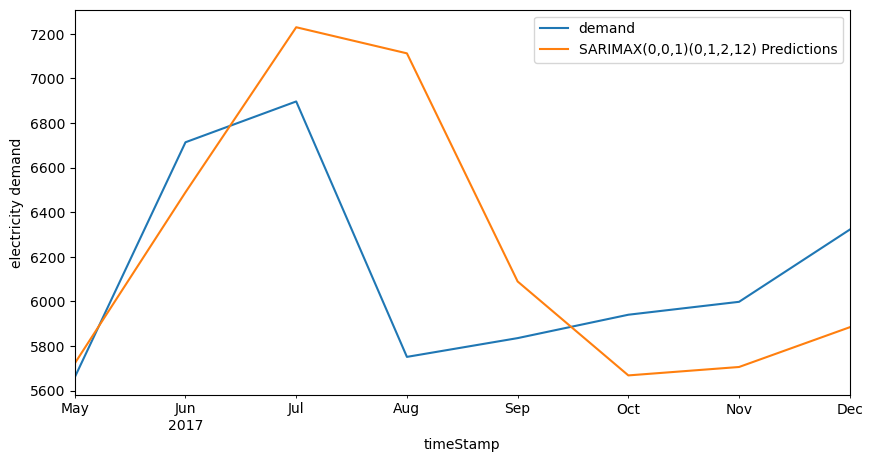

In [76]:
# plot predicted vs observed (test data)
test['demand'].plot(legend=True)
predictions_aa_sr.rename('SARIMAX(0,0,1)(0,1,2,12) Predictions').plot(legend=True,figsize=(10, 5))
plt.ylabel("electricity demand")
plt.xlabel("timeStamp")

In [77]:
MSE_aa_sr = mean_squared_error(test['demand'], predictions_aa_sr)
print('SARIMAX(0,0,1)(0,1,2,12) MSE error : ', MSE_aa_sr)

SARIMAX(0,0,1)(0,1,2,12) MSE error :  304144.0404333243


In [78]:
RMSE_aa_sr = MSE_aa_sr**(1/2)
print('SARIMAX(0,1,1) RMSE error : ', RMSE_aa_sr)

SARIMAX(0,1,1) RMSE error :  551.4925570062794


# SARIMAX - MODEL FROM OUR PREDECTED PDQ VALUES

In [79]:
model = SARIMAX(train['demand'], order=(1,0,0), seasonal_order=(1,0,0, 12), enforce_invertibility=False)
results_pr_sr = model.fit()
results_pr_sr.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             demand   No. Observations:                   64
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -446.943
Date:                            Thu, 20 Jul 2023   AIC                            899.887
Time:                                    08:55:37   BIC                            906.364
Sample:                                01-31-2012   HQIC                           902.438
                                     - 04-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9755      0.027     36.271      0.000       0.923       1.028
ar.S.L12       0.8794      0.058     15.168      0.000       0.766       0.993
sigma2      4.759e+04   1.03e+04      4.600      0.000    2.73e+04    6.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.43
Prob(Q):                              0.95   Prob(JB):                         0.49
Heteroskedasticity (H):               1.44   Skew:                            -0.33
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 0, 'timeStamp')

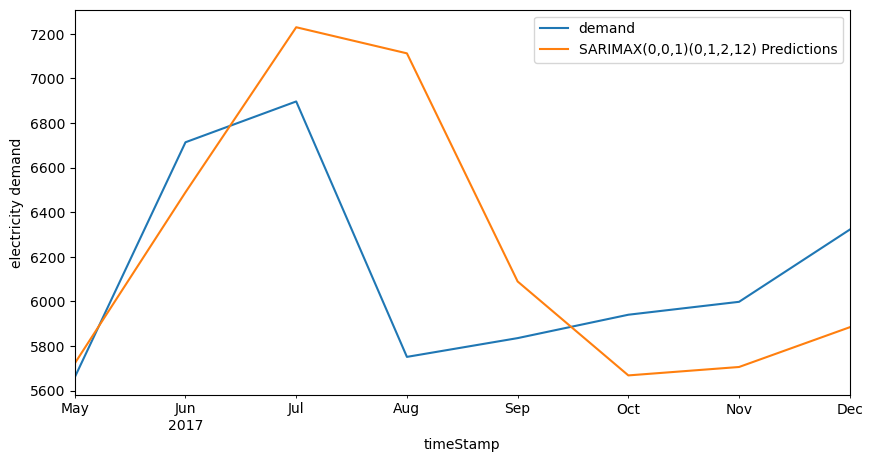

In [80]:
# plot predicted vs observed (test data)
test['demand'].plot(legend=True)
predictions_aa_sr.rename('SARIMAX(0,0,1)(0,1,2,12) Predictions').plot(legend=True,figsize=(10, 5))
plt.ylabel("electricity demand")
plt.xlabel("timeStamp")

In [81]:

predictions_pr_sr = results_pr_sr.predict(start=len(train), end=len(df_ts_monthly)-1, typ='levels')
# compare predicted to expected values
for i in range(len(predictions_pr_sr)):
    print(f"predicted = {predictions_pr_sr[i]}, expected = {test['demand'][i]}")

predicted = 5723.842904827376, expected = 5659.811777777778
predicted = 6280.382312119484, expected = 6713.551091346154
predicted = 7070.842087718444, expected = 6896.509324074074
predicted = 7016.244017489816, expected = 5751.095125
predicted = 6014.112340136419, expected = 5835.259494791667
predicted = 5527.2119555033005, expected = 5940.14121875
predicted = 5524.020028523416, expected = 5998.057947916666
predicted = 5717.612721881545, expected = 6321.863982758621


In [82]:
RES_pr_sr=test['demand']-predictions_pr_sr
RES_pr_sr.sum()

242.0215942151599

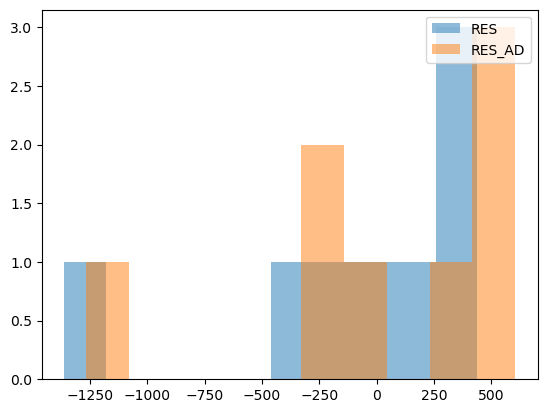

In [83]:
plt.hist(RES_aa_sr, alpha=0.5, label='RES')
plt.hist(RES_pr_sr, alpha=0.5, label='RES_AD')
plt.legend(loc='upper right')
plt.show()

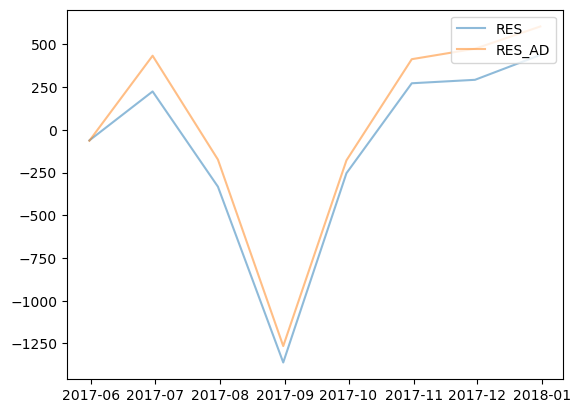

In [84]:
plt.plot(RES_aa_sr, alpha=0.5, label='RES')
plt.plot(RES_pr_sr, alpha=0.5, label='RES_AD')
plt.legend(loc='upper right')
plt.show()

In [85]:
MSE_pr_sr = mean_squared_error(test['demand'], predictions_pr_sr)
print('SARIMAX(1,0,0)(1,0,0,12) MSE error : ', MSE_pr_sr)

SARIMAX(1,0,0)(1,0,0,12) MSE error :  326882.4076504563


In [86]:
RMSE_pr_sr = MSE_pr_sr**(1/2)
print('SARIMAX(0,1,1) RMSE error : ', RMSE_pr_sr)

SARIMAX(0,1,1) RMSE error :  571.736309543531


# FORESASTING OF ELECTRICITY FOR NEXT 3 YEARS with autoarima

In [87]:
model = SARIMAX(df_ts_monthly['demand'], order=(0,0,1), seasonal_order=(0, 1, 2, 12), enforce_invertibility=False)
results_aa_sr = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [88]:
forecast_aa_sr = results_aa_sr.predict(start=len(df_ts_monthly), end=len(df_ts_monthly)+(12*3), typ='levels')

Text(0.5, 0, 'timeStamp')

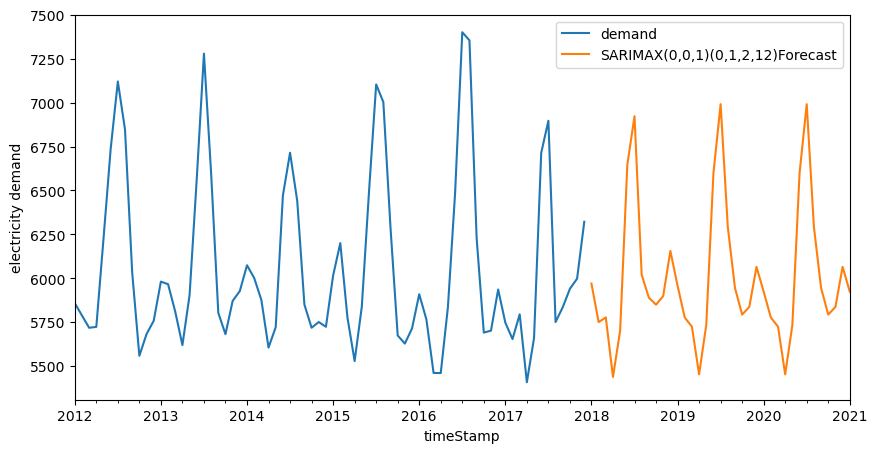

In [89]:
df_ts_monthly['demand'].plot(legend=True)
forecast_aa_sr.rename('SARIMAX(0,0,1)(0,1,2,12)Forecast').plot(legend=True,figsize=(10, 5))
plt.ylabel("electricity demand")
plt.xlabel("timeStamp")


# FORESASTING OF ELECTRICITY FOR NEXT 3 YEARS with autoarima

In [90]:
model_pr = SARIMAX(df_ts_monthly['demand'], order=(0,0,1), seasonal_order=(2, 0, 1, 12), enforce_invertibility=False)
results_pr_sr = model_pr.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [91]:
forecast_pr_sr = results_pr_sr.predict(start=len(df_ts_monthly), end=len(df_ts_monthly)+(12*3), typ='levels')

Text(0.5, 0, 'timeStamp')

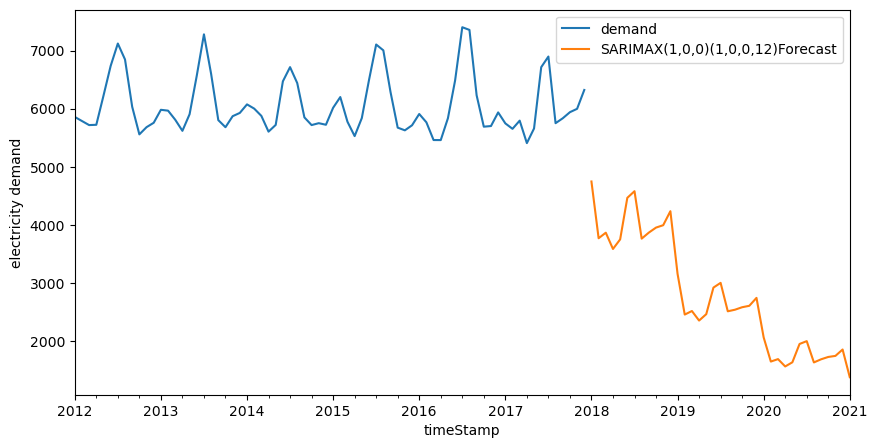

In [92]:
df_ts_monthly['demand'].plot(legend=True)
forecast_pr_sr.rename('SARIMAX(1,0,0)(1,0,0,12)Forecast').plot(legend=True,figsize=(10, 5))
plt.ylabel("electricity demand")
plt.xlabel("timeStamp")


Text(0.5, 0, 'timeStamp')

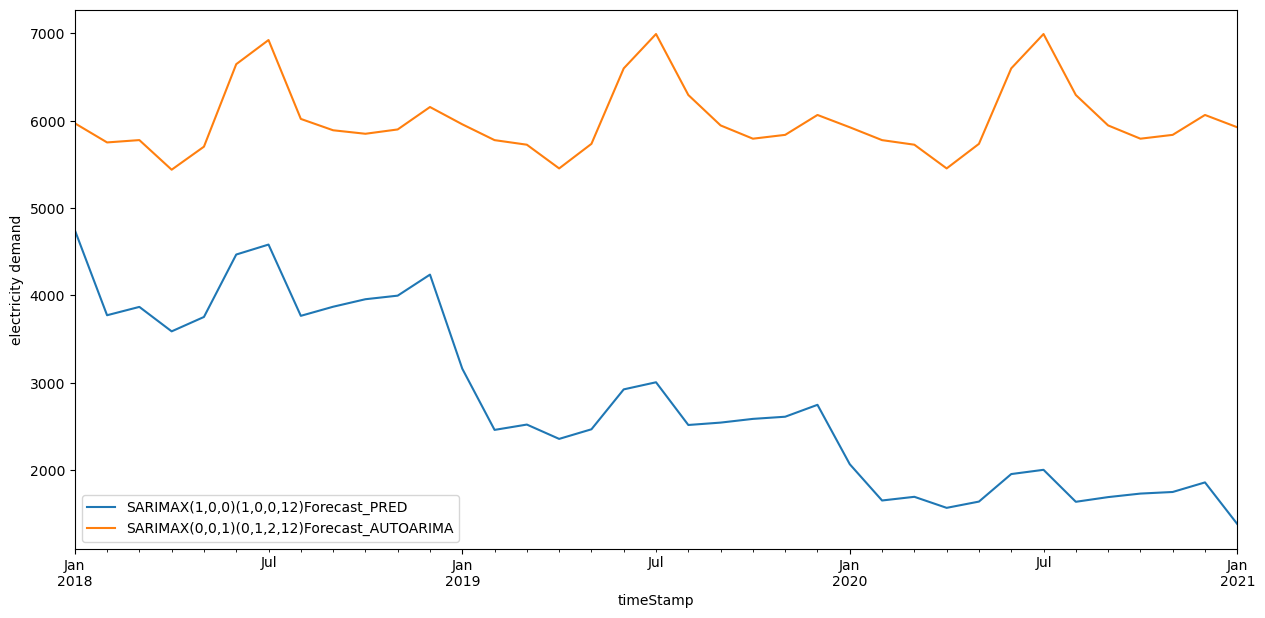

In [93]:
forecast_pr_sr.rename('SARIMAX(1,0,0)(1,0,0,12)Forecast_PRED').plot(legend=True,figsize=(15,7))
forecast_aa_sr.rename('SARIMAX(0,0,1)(0,1,2,12)Forecast_AUTOARIMA').plot(legend=True)
plt.ylabel("electricity demand")
plt.xlabel("timeStamp")



In [94]:
print(f"RMSE OF  AUTO ARIMA OF ARIMA MODEL = {RMSE_aa_ar}")
print(f"RMSE OF  PREDECTED (P,D,Q)VALUES OF ARIMA MODEL = {RMSE_pr_ar}")
print(f"RMSE OF  AUTO ARIMA OF SARIMAX MODEL = {RMSE_aa_sr}")
print(f"RMSE OF  PREDECTED(P,D,Q)VALUES OF SARIMAX MODEL = {RMSE_pr_sr}")

RMSE OF  AUTO ARIMA OF ARIMA MODEL = 424.21894517536225
RMSE OF  PREDECTED (P,D,Q)VALUES OF ARIMA MODEL = 518.2400113926217
RMSE OF  AUTO ARIMA OF SARIMAX MODEL = 551.4925570062794
RMSE OF  PREDECTED(P,D,Q)VALUES OF SARIMAX MODEL = 571.736309543531


# FROM ABOVE RMSE VALUES RMSE IS less  in autoarima ARIMA MODEL BUT WE HAVE SEASONALITY IN OUR DATA SO, SARIMAX(0,0,1)(0,1,2,12) IS SUTABLE FOR OUR DATA

#nest three years forecasting electricity  demand in KW

In [95]:
forecast_aa_sr.rename('SARIMAX(0,0,1)(0,1,2,12)Forecast')

2018-01-31    5970.186341
2018-02-28    5750.646334
2018-03-31    5777.403532
2018-04-30    5438.595196
2018-05-31    5702.203512
2018-06-30    6645.976158
2018-07-31    6922.287956
2018-08-31    6019.620337
2018-09-30    5889.838040
2018-10-31    5849.763384
2018-11-30    5899.256059
2018-12-31    6155.754637
2019-01-31    5957.943194
2019-02-28    5776.907822
2019-03-31    5724.558159
2019-04-30    5453.267684
2019-05-31    5734.460399
2019-06-30    6597.870869
2019-07-31    6990.966495
2019-08-31    6293.372403
2019-09-30    5945.241726
2019-10-31    5793.417135
2019-11-30    5837.251518
2019-12-31    6064.982319
2020-01-31    5924.076770
2020-02-29    5776.907822
2020-03-31    5724.558159
2020-04-30    5453.267684
2020-05-31    5734.460399
2020-06-30    6597.870869
2020-07-31    6990.966495
2020-08-31    6293.372403
2020-09-30    5945.241726
2020-10-31    5793.417135
2020-11-30    5837.251518
2020-12-31    6064.982319
2021-01-31    5924.076770
Freq: M, Name: SARIMAX(0,0,1)(0,1,2,12